# Using this package

This package allows access to two different routines for computing Fourier/Hankel transform type integrals. It has both a Bessel-Quadrature routine and FFTlog (which requires FFTW).

This notebook shows a very common transformation which takes the form:
$$
f(x) = \int_0^\infty{\rm d}k\ \frac{k^2F(k)}{2\pi}\ j_{\nu}(kx)\,.
$$
This kind of integral appears everywhere in my field (cosmology). Any transformation fo this form can be computed however, as long as your integrand extrapolates to a power law at its edges.

The baseline comparison is to the same integral computed explicitely (i.e. with splines) as implemented in the `cluster_toolkit`.

In [1]:
import numpy as np
import fastcorr
import matplotlib.pyplot as plt
import cluster_toolkit as ct
%matplotlib inline

In [2]:
plt.rc("font", size=18, family="serif")
#plt.rc("text", usetex=True)

In [3]:
k = np.loadtxt("k.txt")
p = np.loadtxt("pnl_z0.txt")

In [4]:
#Compute the true transform using a high-accuracy spline
r = np.logspace(-3, 3, 3000)
xi_true = ct.xi.xi_mm_at_r(r, k, p, exact=True)

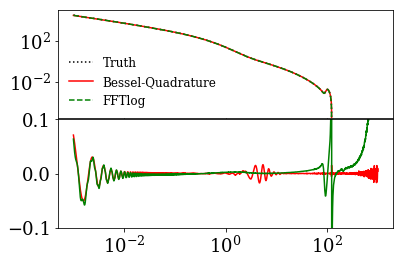

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
plt.subplots_adjust(hspace=0.01)

xi_bess = fastcorr.general_spherical_transform(r, k, p, nu=0)
xi_fftlog = fastcorr.fftlog_spherical_transform(r, k, p)
ax[0].loglog(r, xi_true, ':', c='k', label="Truth")
ax[0].loglog(r, xi_bess, c='r', label="Bessel-Quadrature")
ax[0].loglog(r, xi_fftlog, '--', c='g', label="FFTlog")
ax[0].legend(frameon=False, fontsize=12)

#ax[0].set_yscale("symlog")
ax[1].plot(r, (xi_true-xi_bess)/xi_true, c='r')
ax[1].plot(r, (xi_true-xi_fftlog)/xi_true, c='g')
_ = ax[1].set_ylim(-.1, .1)

(-1, 1)

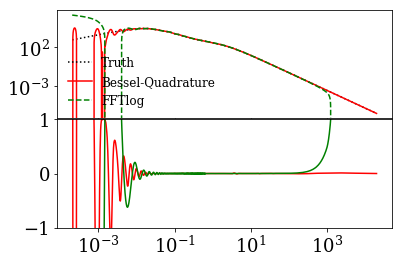

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
plt.subplots_adjust(hspace=0.01)

p_bess = fastcorr.general_spherical_transform(k, r, xi_bess, nu=0, reverse=True)
p_fftlog = fastcorr.fftlog_spherical_transform(k, r, xi_fftlog, reverse=True)

ax[0].loglog(k, p, ":", c='k', label="Truth")
ax[0].loglog(k, p_bess, c='r', label="Bessel-Quadrature")
ax[0].loglog(k, p_fftlog, "--", c='g', label="FFTlog")
ax[0].legend(loc=0, frameon=False, fontsize=12)

ax[1].plot(k, (p-p_bess)/p, c='r')
ax[1].plot(k, (p-p_fftlog)/p, c='g')
ax[1].set_ylim(-1,1)